In [1]:
%matplotlib inline
#%matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
sym.init_printing()
import control

Reference:
https://www.electronics-tutorials.ws/oscillator/wien_bridge.html

In [2]:
s = sym.Symbol('s')
C_1 = sym.Symbol('C1')
C_2 = sym.Symbol('C2')
C_ = sym.Symbol('C')
R_1 = sym.Symbol('R1')
R_2 = sym.Symbol('R2')
R_ = sym.Symbol('R')
H_s = sym.Symbol('H(s)')

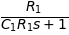

In [3]:
exp1 = R_1/(1+s*C_1*R_1)
exp1

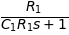

In [4]:
exp2 = exp1
exp2

In [5]:
exp3 = R_2+1/(s*C_2)
exp3

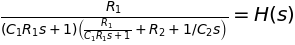

In [6]:
eq1 = sym.Eq((exp1/(exp2+exp3)),H_s)
eq1

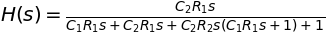

In [7]:
eq1_sim = sym.simplify(eq1)
eq1_sim

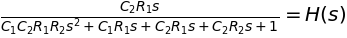

In [8]:
eq1_fac = sym.factor(eq1)
eq1_fac

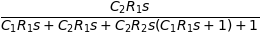

In [9]:
exp4 = sym.simplify(exp1/(exp2+exp3))
exp4

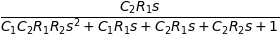

In [10]:
exp5 = sym.factor(exp1/(exp2+exp3))
exp5

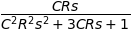

In [11]:
exp6 = exp5.subs([(C_1,C_),(C_2,C_),(R_1,R_),(R_2,R_)])
exp6

In [12]:
exp7 = exp6.subs([(C_,1),(R_,1)])
exp7

In [13]:
exp7num, exp7den = sym.simplify(exp7).as_numer_denom()  # expressions

In [14]:
exp7num

In [15]:
exp7den

In [16]:
p_num_den = sym.poly(exp7num, s), sym.poly(exp7den, s)  # polynomials
p_num_den

In [17]:
c_num_den = [sym.expand(p).all_coeffs() for p in p_num_den]
c_num_den

In [18]:
l_num, l_den = [sym.lambdify((), c)() for c in c_num_den]  # convert to floats

In [19]:
H_tf = control.TransferFunction(l_num,l_den)
H_tf


      s
-------------
s^2 + 3 s + 1

In [20]:
#G_tf = control.TransferFunction([1,0],[1,3,1])
#num1 = (1,0)
#den1 = (1,3,1)
#H_tf = control.TransferFunction(num1,den1)
H_tf


      s
-------------
s^2 + 3 s + 1

In [21]:
#Poles
sym.solve(exp7den,s, dict=True)

In [22]:
X_s = sym.Symbol('X(s)')
Y_s = sym.Symbol('Y(s)')
G_s = sym.Symbol('G(s)')
K = sym.Symbol('K')
z_1 = sym.Symbol('z1')
p_1 = sym.Symbol('p1')
p_2 = sym.Symbol('p2')

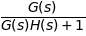

In [23]:
exp8 = G_s/(1+G_s*H_s)
exp8

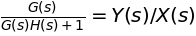

In [24]:
eq8 = sym.Eq(exp8,Y_s/X_s)
eq8

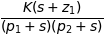

In [25]:
exp9 = K*(s+z_1)/((s+p_1)*(s+p_2))
exp9

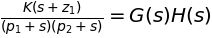

In [26]:
eq9 = sym.Eq(exp9,G_s*H_s)
eq9

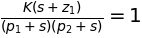

In [27]:
eq10 = sym.Eq(exp9,1)
eq10

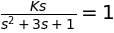

In [28]:
eq11 = sym.Eq(K*exp7,1)
eq11

In [29]:
eq12 = sym.Eq(s**2+(3-K)*s+1,0)
eq12

In [30]:
sym.simplify(s**2+(3-K)*s+1)

In [31]:
eq13 = sym.solve(eq11,s, dict=True)
eq13

In [32]:
sym.solve(eq11.subs([(K,0.001)]),s, dict=True)

In [33]:
sym.solve(eq11.subs([(K,1)]),s, dict=True)

In [34]:
sym.solve(eq11.subs([(K,2)]),s, dict=True)

In [35]:
sym.solve(eq11.subs([(K,3)]),s, dict=True)

In [36]:
sym.solve(eq11.subs([(K,4)]),s, dict=True)

In [37]:
sym.solve(eq11.subs([(K,5)]),s, dict=True)

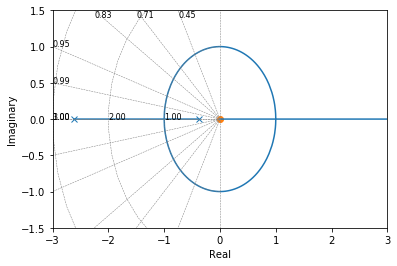

In [38]:
Out_rl = control.root_locus(sys=(-H_tf), xlim=(-3,3), ylim=(-1.5,1.5))